# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### План выполнения работы

Шаг 1. Откройть файл с данными и изучить общую информацию

Шаг 2. Предобработать данных

Шаг 3. Посчитайтать и добавить в таблицу:

    а. цену квадратного метра;
    б. день недели, месяц и год публикации объявления;
    в. этаж квартиры; варианты — первый, последний, другой;
    г. соотношение жилой и общей площади, а также отношение площади кухни к общей.
    
Шаг 4. Провести исследовательский анализ данных 

Шаг 5. Написать общий вывод

### Описание данных
1. airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
2. balcony — число балконов
3. ceiling_height — высота потолков (м)
4. cityCenters_nearest — расстояние до центра города (м)
5. days_exposition — сколько дней было размещено объявление (от публикации до снятия)
6. first_day_exposition — дата публикации
7. floor — этаж
8. floors_total — всего этажей в доме
9. is_apartment — апартаменты (булев тип)
10. kitchen_area — площадь кухни в квадратных метрах (м²)
11. last_price — цена на момент снятия с публикации
12. living_area — жилая площадь в квадратных метрах(м²)
13. locality_name — название населённого пункта
14. open_plan — свободная планировка (булев тип)
15. parks_around3000 — число парков в радиусе 3 км
16. parks_nearest — расстояние до ближайшего парка (м)
17. ponds_around3000 — число водоёмов в радиусе 3 км
18. ponds_nearest — расстояние до ближайшего водоёма (м)
19. rooms — число комнат
20. studio — квартира-студия (булев тип)
21. total_area — площадь квартиры в квадратных метрах (м²)
22. total_images — число фотографий квартиры в объявлении

Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep="\t") #разделим значения столбцо, склеенных в строки

In [4]:
data.head(40) #рассморим структуру исходных данных

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [6]:
data.query('total_area > 103')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
19,16,14200000.0,121.00,2019-01-09T00:00:00,3,2.75,16.0,76.0,8,NaN,...,12.00,NaN,Санкт-Петербург,38900.0,12843.0,0.0,NaN,0.0,NaN,97.0
35,6,15500000.0,149.00,2017-06-26T00:00:00,5,NaN,5.0,104.0,4,NaN,...,17.00,NaN,Санкт-Петербург,23670.0,3502.0,0.0,NaN,1.0,779.0,644.0
42,13,22000000.0,161.80,2015-07-08T00:00:00,4,2.80,4.0,80.9,2,False,...,17.60,5.0,Петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23622,15,7490000.0,114.00,2018-08-13T00:00:00,4,3.15,4.0,81.3,4,NaN,...,12.00,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,245.0
23631,17,14799000.0,104.00,2018-11-18T00:00:00,3,3.10,4.0,66.0,2,NaN,...,14.00,1.0,Санкт-Петербург,39047.0,13944.0,0.0,NaN,1.0,553.0,90.0
23664,5,9000000.0,110.00,2015-12-10T00:00:00,4,3.36,7.0,64.6,5,NaN,...,15.80,NaN,Санкт-Петербург,26313.0,5016.0,3.0,417.0,1.0,118.0,816.0
23684,20,21400000.0,145.00,2018-11-02T00:00:00,4,3.00,26.0,71.4,17,NaN,...,15.60,NaN,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN


#### Рассмотрим возможные проблемы в исходных данных по столбцам :
    1. first_day_exposition
        a. Используется тип object для значений даты и времени
    3. ceiling_height 
        a. Есть пропуски
    4. floors_total 
        a. Есть пропуски
    5. living_area
        a. Есть пропуски
    6. is_apartment
        a. Используется тип данных object для значений типа является / не является 
        б. Есть пропуски
    7. kitchen_area
        a. Есть пропуски
    8. balcony 
        a. Для продсчета количества балконов используется тип float64, что не корректно для целых значений
        b. Есть пропуски
    9. locality_name 
        a. Есть пропуски
    10. airports_nearest  - проверить на целые числа
        a. Есть пропуски 
    11. cityCenters_nearest 
        а. Есть пропуски
    12. parks_around3000
        а. Есть пропуски 
        б. Для продсчета количества используется тип float64, что не корректно для целых значений
    13. parks_nearest
        a. Есть пропуски
    14. ponds_around3000
        а. Есть пропуски 
        б. Для продсчета количества используется тип float64, что не корректно для целых значений
    15. ponds_nearest
        a. Есть пропуски
    16. days_exposition
        а. Для продсчета количества используется тип float64, что не корректно для целых значений
        б. Есть пропуски

### Вывод
Значения столбцов исходного датафрема были записаны построчно, разделенные знаками табуляции. Датафрейм имеет 23699 строк и 22 столбцов. Всего в таблице используется 4 типа данных : bool(2), float64(14), int64(3), object(3). В некоторых столбцах присутствуют пустые значения. Часть столбцов имеют некорректные типы данных. Имеются столбцы с плохочитаемыми названиями

### Шаг 2. Предобработка данных

In [8]:
#найдем количество пустых значения для каждого столбца
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [111]:
#изучим количество уникальные значения для всех столбцов
for i in data.columns:
    print(data[i].value_counts())

10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
14     986
4      986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
28       4
32       4
50       3
29       3
31       2
35       2
30       2
27       2
37       1
39       1
25       1
42       1
Name: total_images, dtype: int64
4500000.0     342
3500000.0     291
4000000.0     260
4300000.0     260
4200000.0     259
             ... 
4412094.0       1
6416000.0       1
4581000.0       1
34551000.0      1
6029433.0       1
Name: last_price, Length: 2978, dtype: int64
45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
45.85       1
44.18       1
59.83       1
127.20      1
23.55       1
Name: total_area, Length: 2182, dtype: int64
2018-02-01T00:00:00    368
2017-11-10T00:00:00    240
2017-10-13T00:00:00    124
2017-09-27T00:00:00    111

In [112]:
#рассмотрим уникальные значения для каждого столбца 
for i in data.columns:
    print(i)
    print(data[i].unique())
    print()

total_images
[20  7 10  0  2  6  5 18  9  1 16 11  8 12 13  3 15 17 14 19 32  4 35 39
 23 21 27 30 24 25 28 31 22 29 26 50 42 37]

last_price
[13000000.  3350000.  5196000. ...  6151120. 21400000. 11475000.]

total_area
[108.    40.4   56.   ...  66.86 133.81  76.75]

first_day_exposition
['2019-03-07T00:00:00' '2018-12-04T00:00:00' '2015-08-20T00:00:00' ...
 '2014-12-29T00:00:00' '2016-09-12T00:00:00' '2015-07-19T00:00:00']

rooms
[ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]

ceiling_height
[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82
  

#### Работа с пропусками

##### Столбцы, имеющие пропуски, их причины и варианты заполнения по необходимости :

1. ceiling_height  
    Причина : пользователь не указал данные   
    Заполнение : не требуется
2. floors_total  
    Причина : пользователь не указал данные   
    Заполнение : не требуется
3. living_area   
    Причина : пользователь не указал данные   
    Заполнение : не требуется
4. is_apartment    
    Причина : некорректный тип сбора данных, в связи с чем пустые значения не были по умолчанию False вместо NaN. Пользователи 
    скорее всего не заполняли этот папраметр, если недвижимость не являлась апартаментами.      
    Заполнение : заполнить False
5. kitchen_area    
    Причина : пользователь не указал данные    
    Заполнение : не требуется
6. balcony    
    Причина : скорее всего пользователь решил не указать данные о балконах, если их не было в квартире    
    Заполнение : заполнить нулями
7. locality_name     
    Причина : пользователь не указал данные    
    Заполнение : не требуется
8. airports_nearest     
    Причина : пользователь не указал данные    
    Заполнение : не требуется
9. cityCenters_nearest     
    Причина : пользователь не указал данные     
    Заполнение : не требуется
10. parks_around3000    
     Причина : скорее всего пользователь решил не указать данные о парках в округе, если их не было рядом     
     Заполнение : заполнить нулями
11. parks_nearest   
     Причина : пользователь не указал данные, возможно в связи с тем, что ближайшие парки очень далеко   
     Заполнение : не требуется
12. ponds_around3000    
     Причина : скорее всего пользователь решил не указать данные о прудах в округе, если их не было рядом    
     Заполнение : заполнить нулями
13. ponds_nearest     
     Причина : пользователь не указал данные, возможно в связи с тем, что ближайшие пруды очень далеко    
     Заполнение : не трбуется
14. days_exposition    
     Причина : возможно объявление к моменту составления датафрема еще не было снято    
     Заполнение : не трбуется
     
    


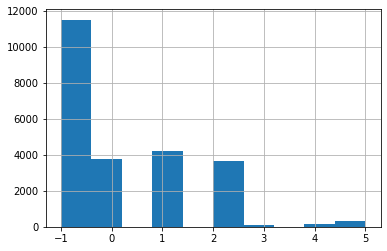

In [37]:
#рассмотрим распределение по кол-ву балконов:
data['balcony'].hist()

In [38]:
#заполним пропуски нулями там, где это будет логичным
data['balcony'] = data['balcony'].fillna(-1) #заполнил пропуски невозможным значением
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [39]:
#столбец is_apartment почти полностью заполнен пропусками, рассмотрим как распределены его остальные значения
data['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

In [40]:
data['is_apartment'].isnull().sum() #посчитаем количество пропусков

0

In [41]:
# раз пропусков большинство, то будем считать, что отсутствующие значения говорят о том, что недвижимость не является 
# апартаментами и все nan можно заменить на False


In [42]:
data['is_apartment'] = data['is_apartment'].fillna(False) 


In [43]:
# посмотрим сколько пустых значений в floors_total
data['floors_total'].isnull().sum()

0

In [44]:
# заполним единицами 86 пропусков, предположив, что это одноэтажные дома
# пропуски составляют 0,003 от всех объявлений, поэтому их заполнение не повлияет на общие тренды, зато изабавит от проблем с 
# дальнейшими расчетами
data['floors_total'] = data['floors_total'].fillna(1)

In [45]:
#проверим результаты замен:
data.isnull().sum()

total_images             0
last_price               0
total_area               0
first_day_exposition     0
rooms                    0
ceiling_height           0
floors_total             0
living_area              0
floor                    0
is_apartment             0
studio                   0
open_plan                0
kitchen_area             0
balcony                  0
locality_name           49
airports_nearest         0
cityCenters_nearest      0
parks_around3000         0
parks_nearest            0
ponds_around3000         0
ponds_nearest            0
days_exposition          0
dtype: int64

In [46]:
#Заполню все остальные пропуски непустыми значениями. -1 думаю подойдет и для остальных

data['ceiling_height'] = data['ceiling_height'].fillna(-1)
data['living_area'] = data['living_area'].fillna(-1)
data['kitchen_area'] = data['kitchen_area'].fillna(-1)
data['airports_nearest'] = data['airports_nearest'].fillna(-1)
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(-1)
data['parks_nearest'] = data['parks_nearest'].fillna(-1)
data['ponds_nearest'] = data['ponds_nearest'].fillna(-1)
data['days_exposition'] = data['days_exposition'].fillna(-1)


#### Изменение типов данных
Большая часть числовых столбцов в датафрейме имеет тип float64, однако из всех столбцов нецелые значения имеются только в 
следующих столбцах : total_area, ceiling_hieght, living_area и kitchen_area. Все остальные числовые столбцы либо заполнены строго целыми значениями, либо совсем не требуют типа данных с плавающей точкой.

In [47]:
#заменим тип данных float65 на int, в столбцах, в которых нет пропусков:
data['last_price'] = data['last_price'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['airports_nearest'] = data['airports_nearest'].astype('int')
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['parks_nearest'] = data['parks_nearest'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['ponds_nearest'] = data['ponds_nearest'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')

In [48]:
# Переведем is_apartmet в bool
data['is_apartment'] = data['is_apartment'].astype('bool') 

In [49]:
#переведем дату размещения объявления в datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d') 

In [50]:
#проверим результаты изменений
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        23699 non-null int64
cityCenters_nearest     23699 non-null int64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null int64
ponds_around3000     

### Вывод

В предобработке данных пустые значения столбцов balcony, parks_around3000 и ponds_around3000 я заменил на нули т.к. пользователи скорее всего не указывали информацию из этих столбцов в связи с отсутсвием этих характеристик в их объявлениях.   Значения столбца is_apartment я привел к двум типам и затем перевел в bool т.к. значения столбца выражают состояния является / не является. Те столбцы, в которых я избавился от NaNов, и те, у которых изначально был тип float64, но все данные целочисленные и неимеющие пропусков, я перевел в тип int. Перевел в int чтобы оптимизировать датафрейм и дальнейшую работу с ним, избегая хранения пустых неиспользуемых байтов.

### Шаг 3. Посчитайте и добавьте в таблицу

In [51]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.0,-1,Санкт-Петербург,18863,16028,1,482,2,755,-1
1,7,3350000,40.4,2018-12-04,1,-1.00,11,18.6,1,False,...,11.0,2,посёлок Шушары,12817,18603,0,-1,0,-1,81
2,10,5196000,56.0,2015-08-20,2,-1.00,5,34.3,4,False,...,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159.0,2015-07-24,3,-1.00,14,-1.0,9,False,...,-1.0,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,41.0,-1,Санкт-Петербург,31856,8098,2,112,1,48,121


airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
balcony — число балконов
ceiling_height — высота потолков (м)
cityCenters_nearest — расстояние до центра города (м)
days_exposition — сколько дней было размещено объявление (от публикации до снятия)
first_day_exposition — дата публикации
floor — этаж
floors_total — всего этажей в доме
is_apartment — апартаменты (булев тип)
kitchen_area — площадь кухни в квадратных метрах (м²)
last_price — цена на момент снятия с публикации
living_area — жилая площадь в квадратных метрах(м²)
locality_name — название населённого пункта
open_plan — свободная планировка (булев тип)
parks_around3000 — число парков в радиусе 3 км
parks_nearest — расстояние до ближайшего парка (м)
ponds_around3000 — число водоёмов в радиусе 3 км
ponds_nearest — расстояние до ближайшего водоёма (м)
rooms — число комнат
studio — квартира-студия (булев тип)
total_area — площадь квартиры в квадратных метрах (м²)
total_images — число фотографий квартиры в объявлении

In [52]:
#добавим в таблицу столбец с ценой квадратного метра
data['meter_price'] = data['last_price']/data['total_area']

In [53]:
#добавим в таблицу столбцы с днем недели, месяцем и голодом
data['week_day'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year


In [54]:
#добавим в таблицу столбец c типом этажа (первый, последний, другой)
floor_type = []                             # создадим массив типов этажа
for i in range(len(data['floor'])):         # использовал if для проверки первого условия, т.к. считаю, что логичнее приписать
    if data.loc[i, 'floor'] == 1:           # одноэтажному дому тип этажа 'первый', чем 'последний', если 
        floor_type.append(1)         # где floor = 1 и floors_total = 1 
    elif data.loc[i, 'floor'] == data.loc[i, 'floors_total']:
        floor_type.append(2)
    else:
        floor_type.append(3)
  
 #Первый этаж - 1
 #Последний - 2
 #Другое - 3 
 # Заполнил именно цифрами, чтобы в дальнейшем строить диаграммы рассеивания

In [55]:
data['floor_type'] = floor_type  # добавим столбец в таблицу


In [56]:
#добавим в таблицу столбец c отношением жилой площади к общей
data['live_total_ratio'] = data['living_area']/ data['total_area']

In [57]:
#добавим в таблицу столбец с отношением площади кухни и общей площади 
data['kitchen_total_ratio'] = data['kitchen_area']/ data['total_area']

In [58]:
data.head(20) # Проверим результаты

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,meter_price,week_day,month,year,floor_type,live_total_ratio,kitchen_total_ratio
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2,755,-1,120370.370370,3,3,2019,3,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,-1.00,11,18.60,1,False,...,0,-1,81,82920.792079,1,12,2018,1,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,-1.00,5,34.30,4,False,...,2,574,558,92785.714286,3,8,2015,3,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,-1.00,14,-1.00,9,False,...,3,234,424,408176.100629,4,7,2015,3,-0.006289,-0.006289
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1,48,121,100000.000000,1,6,2018,3,0.320000,0.410000
5,10,2890000,30.40,2018-09-10,1,-1.00,12,14.40,5,False,...,0,-1,55,95065.789474,0,9,2018,3,0.473684,0.299342
6,6,3700000,37.30,2017-11-02,1,-1.00,26,10.60,6,False,...,0,-1,155,99195.710456,3,11,2017,3,0.284182,0.386059
7,5,7915000,71.60,2019-04-18,2,-1.00,24,-1.00,22,False,...,0,-1,-1,110544.692737,3,4,2019,3,-0.013966,0.263966
8,20,2900000,33.16,2018-05-23,1,-1.00,27,15.43,26,False,...,0,-1,189,87454.764777,2,5,2018,3,0.465320,0.265682
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0,-1,289,88524.590164,6,2,2017,3,0.714754,0.106557


### Вывод
На данном шаге я добавил следующие столбцы для упрощения дальнейшего исследования данных : meter_price - цена квадратного метра, 
week_day - день недели, month - месяц и year - год публикации объявления,
floor_type - этаж квартиры  
live_total_ratio - соотношение жилой и общей площади, а также kitchen_total_ratio - отношение площади кухни к общей.

Пропусков больше нигде нет, на их месте отрицательные числа

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### Изучите параметров квартир: площадь, цена, число комнат, высота потолков

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        23699 non-null int64
cityCenters_nearest     23699 non-null int64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null int64
ponds_around3000     

#### площадь

In [60]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

В столбце total_area замечено очень большое стандартное отклонение, значит данные в столбце значительно отличаются от среднего арифметического

AxesSubplot(0.125,0.125;0.775x0.755)


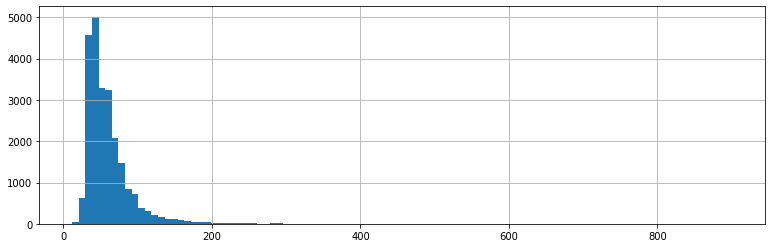

In [61]:
print(data['total_area'].hist(bins = 100, figsize = (13, 4)))

На гистограмме видно, что бОльшая часть квартир имеет площадь меньше 100 кв.м., но есть и с площаью больше 200 кв.м, но их очень мало. В идеале гисторграма должна быть похожа на нормалное распределение, однако слева грфика не видно характерного "плавного хвоста". Рассмотрм гистограмму площадей в рамках 200 кв.м. :

AxesSubplot(0.125,0.125;0.775x0.755)


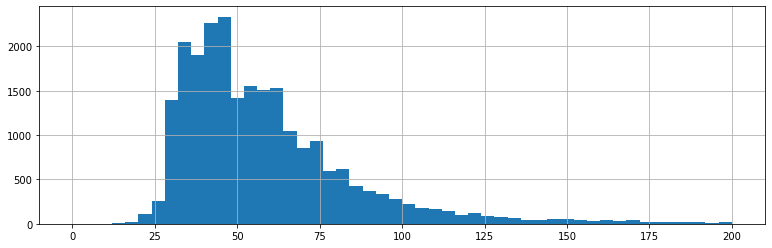

In [62]:
print(data['total_area'].hist(range = (0, 200), bins = 50, figsize = (13, 4)))

Виден очень резкий переход между количеством квартир больше 25 кв.м.

#### цена

In [63]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

В столбце last_price замечено значительное большое стандартное отклонение

AxesSubplot(0.125,0.125;0.775x0.755)


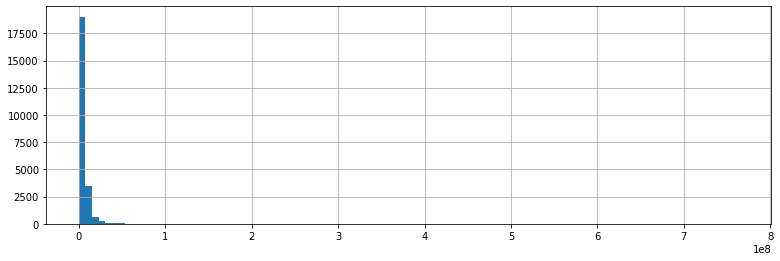

In [64]:
print(data['last_price'].hist(bins = 100, figsize = (13, 4)))

Из гистограммы видно, что пик значений приходится до 5 млн., не удивительно, что график выглядит странно в таком масштабе, ведь самая дорагая недвижимость стоит 763 000 000 руб. Рассморим цены до 10 000 000 р. :

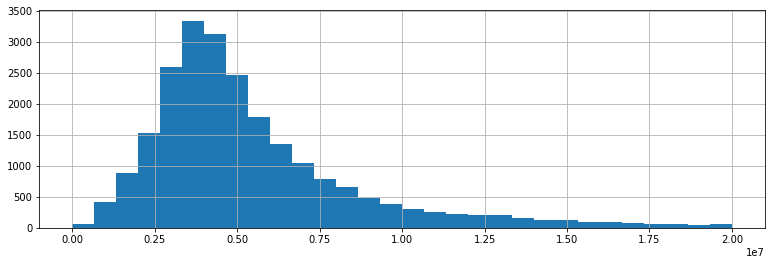

In [65]:
data['last_price'].hist( range = (0, 20000000), bins = 30, figsize = (13, 4))

Данная гистограмма не учитывет слишком дорогие квартиры. Здесь наглядно видно, что большинство квартир стоят меньше 12 млн. р. Распределение теперь похоже на нормальное. В дальнейшем, слишком дорогие квартиры стоит отсечь и считать
выбросами

#### число комнат

In [66]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

В среднем в квартирах по две комнаты. Однако насторажиывет минемальное количество комнат, равное нулю. Стандартное отклонение значительное.

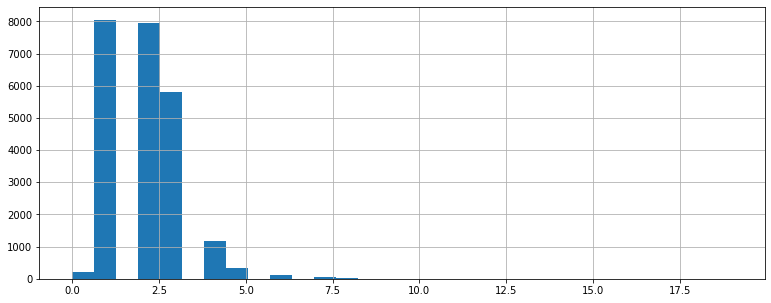

In [67]:
data['rooms'].hist(range = (0, 19), bins = 30, figsize = (13, 5))

In [68]:
data['rooms'].value_counts() # проверим еще раз какие есть значения и сколько их 

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

Типов значений мало, плэтому распределение не похоже на идеально Нормальное. Данное распределение соответствует дейстивтельности. Единственная проблема - количество комнат '0'. 


In [69]:
data['ceiling_height'].describe()

count    23699.000000
mean         1.308191
std          2.085897
min         -1.000000
25%         -1.000000
50%          2.500000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Средняя высота потолков составляет 2.77 метра. Максимальное значение сильно отличается от медианы. Стандартное отклонение 
значительное

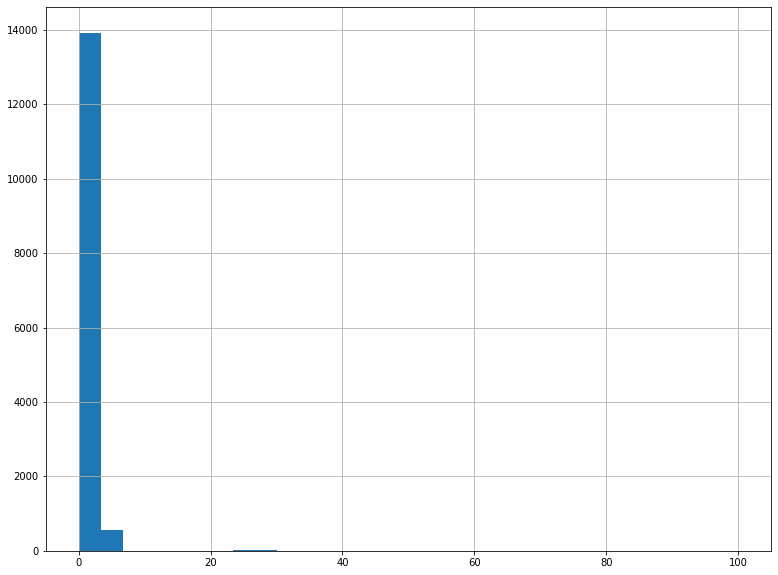

In [70]:
data['ceiling_height'].hist( range = (0, 100), bins = 30, figsize = (13, 10))

Большинство имущества имеет высоту потолков меньше 3 метров, хотя есть и такие, у которы она составляет болльше 20 метов, но
их очень мало. Рассмотрим как распределяются значения до 5 метров :

In [71]:
data['ceiling_height'].value_counts().head(10)

-1.00    9195
 2.50    3515
 2.60    1646
 2.70    1574
 3.00    1112
 2.80     993
 2.55     980
 2.75     910
 2.65     676
 3.20     277
Name: ceiling_height, dtype: int64

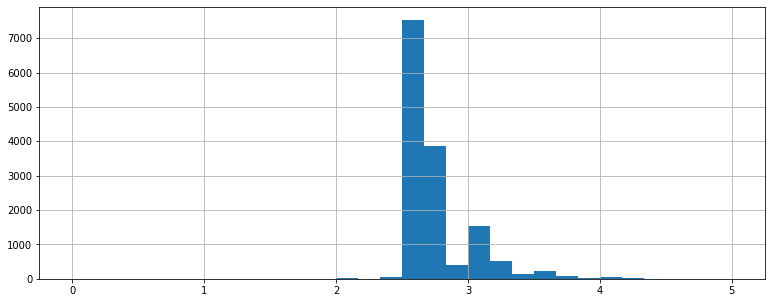

In [72]:
data['ceiling_height'].hist( range = (0, 5), bins = 30, figsize = (13, 5))

Распределение на гистограмме не похоже на Нормальное, т.к. количество потолков стремительно растет с 2,5 метров, не оставляя шансов 'плавным хвостам', однако согласно Строительным нормы и правилам (СНиП), высота потолка не дожна быть ниже 2,5 метров, поэтому такое распределение можно счить логичным. Наводит на подозрение пик в 3 метра. Исходя из количество значений, полученных с помощью метода value_counts, среди потолков в районе 3 метров большинство высотой ровно 3.0. Возможно это
стандарт планировок, объясняющий второй пик.

#### Вывод


1. Площадь
На гистограмме видно, что бОльшая часть квартир имеет площадь меньше 100 кв.м., но есть и с площаью больше 200 кв.м, но их очень мало. Виден очень резкий скачек количества квартир больше 25 кв.м.
Самая популярная площадь между 37-50 кв.м.
2. Цена 
Большинство квартир стоят меньше 12 млн.р. Пик приходится примерно на 3.7 млн.р
4. Количество комнат
В среднем в квартирах по две комнаты. Однако насторажиывет минимильное количество комнат, равное нулю. Скорее всего такое аномальное значение связано с некорректным заполнением формы объявления.
3. Высота потолков
Большинство имущества имеет высоту потолков меньше 3 метров, хотя есть и такие, у которы она составляет больше 20 метов, но их очень мало

### Вопросы к наставнику

1) Как стороить гистограммы с целочисленной ценой деления ?

Да, в последней целые, но в четвертой и пятой цена деления 2.5, я не совсем разобрался по какому принципу она ставится. Параметра, в методе hist для цены деления, чтобы ее менять, не увидел.

#### Анализ времени продажи квартиры
Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [73]:
#получим информацию о столбце. Использую данный метод потому что он дает базовую статичтическую информацию. Так же с помощью 
data['days_exposition'].describe() # удобно получать минимально и максимальное значения для параметра range в метооде hist()

count    23699.000000
mean       156.474619
std        213.645563
min         -1.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [74]:
#посчитаем среднее
data['days_exposition'].median()

74.0

Наблюдается огромное стандартное отклонение, даже большее медианы. Это говорит о очень большом разбросе значений выборки.

Среднее = 180 дней

Медиана = 95 дней. 


In [75]:
data['days_exposition'].isna().sum() #проверим на пропуски

0

Пропусков не так много, следовательно имеющихся значений хватает для вычисления общего тренда

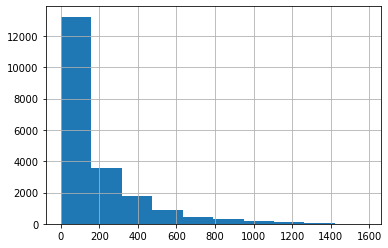

In [76]:
data['days_exposition'].hist(range = (0, 1580))

Распределение Пуассоновское, т.к. описывет количество значений в единицу времени, положительно и несимметрично.
Медиана вдвое меньше среднего т.к. в хвосте имеются большие значения

Оновная масса недвижимости была продана в течении 200 дней. Будем считать, что объвления, провисевшие больще 200 дней будут говорить о затянувшейся продажи. Чтобы понять, какие продажи прошли очень быстро рассмотрим гистограмму со значениями до 200:

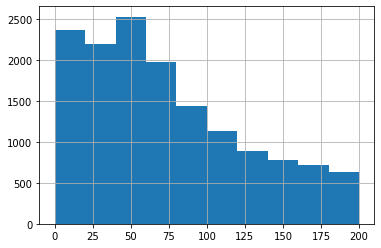

In [77]:
data['days_exposition'].hist(range = (0, 200))

Основной пик времени продаж составил 50 дней. Медиана значительно ближе к нему, чем среднее. Наблюдаем подозрительный пик около 0. Проверим, какие значения расположены до 25 дней существования объявлений. 

In [78]:
less_25 = data.query('days_exposition < 25')
less_25['days_exposition'].value_counts()


-1     3181
 7      234
 4      176
 3      158
 5      152
 14     148
 9      143
 8      139
 20     139
 11     135
 18     129
 13     128
 10     127
 15     126
 22     125
 21     124
 6      124
 19     122
 17     116
 24     116
 23     112
 12     108
 16     100
 2        3
 1        1
Name: days_exposition, dtype: int64

Подозрения оказались напрасными, т.к. все значения распределены равномерно. 

### Вывод

Медиана составила 95 дней. Среднее - 180 дней. Будем считать недвижимость продающуюся более 200 дней долгопродаваемой. Продажи совершенные за 25-200 дней - нормальными по времени. Продажи совершенныее до 25 дней - очень быстрыми.

#### Удаление редких и выбивающихся значений 

 Опишите, какие особенности обнаружили

In [79]:
#построим автомотически 

In [80]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [81]:
data['total_area'].median()

52.0

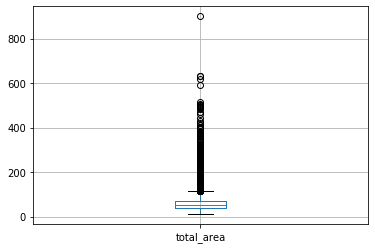

In [82]:
data.boxplot(column = 'total_area')
plt.show()

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        23699 non-null int64
cityCenters_nearest     23699 non-null int64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null int64
ponds_around3000     

In [84]:
#Создадим список столбцов, откуда стоит убрать редкие и выбивающиеся значения
# Я не включил в этот список остальные столбцы, т.к. либо они представляют категориальные переменные 
# ('week_day', 'month', 'balcony', 'floors_total' и др.), либо не участвуют в дальнейшем исследовании
# согласно заданю проекта (например : 'kitchen_area', 'parks_nearest', 'pounds_nearest' )

columns_list = [
    'total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition', 'airports_nearest', 
    'cityCenters_nearest'
]

In [85]:
#Будем работать с новым датафреймом, чтобы сохранить значения старого для последующего сопоставлния
improved_data = data

In [86]:
# Создадим функцию для автоматизации постраения диаграмм размаха по необходимым столбцам
# В функции я также попытался использовать метод query вместо loc, однако попытка провалилась. Её я закомментировал. 

def graph_creator(list, data_frame): 
    print('Диаграммы размаха')
    for column in list: # list - спиок необходимых столбцов для анализа
        info = data_frame[column].describe()# получаем информацию о первом (Q1) и третьем квартилях (Q2)  
        q1 = info[4]
        q3 = info[6]
        iqr = q3 - q1   # считаем межквартильный размах
        border = iqr*1.5   # cчитаем расстояние от Q1 и Q2 до границы, за которой расположены выбросы
        plt.ylim(-0.8*border, q3 + border + 0.8*border) 
        data_frame.boxplot(column = column)  # строим диаграмму размаха
        plt.show()
        print('')
        print('Избавляемся от выбросов для столбца {}, значения \n которых больше Q3 + 1.5*IQR ({:.3f}) и меньше Q1 - 1.5*IQR ({:.3f}).'.format(column, q3 + border,q1 - border))
        #    попытка сразу избавиться от выбросов №1 :                                                                          
        #improved_data = data.query('@q1 - @border <= data[@column] <= @q3 + @border')
        #    попытка избавиться от выбросов #2                                                                                                            
        data_frame[column] = data_frame.loc[               #условие, ограничивающее нужные значения от выбросов
            (data_frame[column] >= (q1 - border)) &  
            (data_frame[column] <= (q3 + border)),
            column
         ]
        print('')
        print('Значения-выбросы удалены')
        print('')
        print('')
    return data_frame

Диаграммы размаха


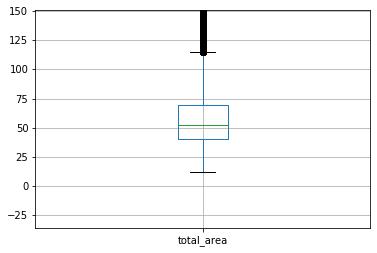


Избавляемся от выбросов для столбца total_area, значения 
 которых больше Q3 + 1.5*IQR (114.750) и меньше Q1 - 1.5*IQR (-4.850).

Значения-выбросы удалены




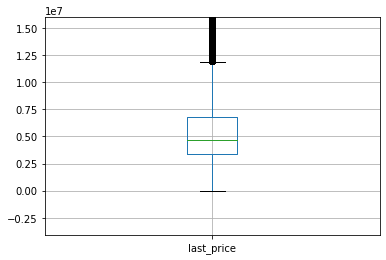


Избавляемся от выбросов для столбца last_price, значения 
 которых больше Q3 + 1.5*IQR (11900000.000) и меньше Q1 - 1.5*IQR (-1700000.000).

Значения-выбросы удалены




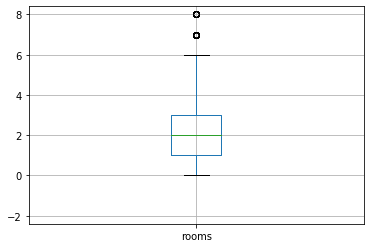


Избавляемся от выбросов для столбца rooms, значения 
 которых больше Q3 + 1.5*IQR (6.000) и меньше Q1 - 1.5*IQR (-2.000).

Значения-выбросы удалены




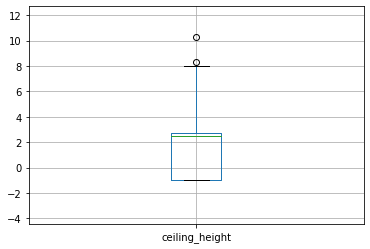


Избавляемся от выбросов для столбца ceiling_height, значения 
 которых больше Q3 + 1.5*IQR (8.250) и меньше Q1 - 1.5*IQR (-6.550).

Значения-выбросы удалены




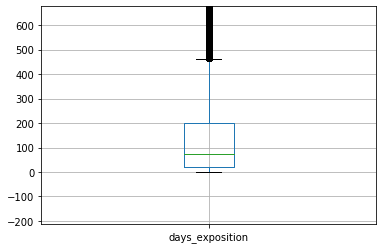


Избавляемся от выбросов для столбца days_exposition, значения 
 которых больше Q3 + 1.5*IQR (464.500) и меньше Q1 - 1.5*IQR (-243.500).

Значения-выбросы удалены




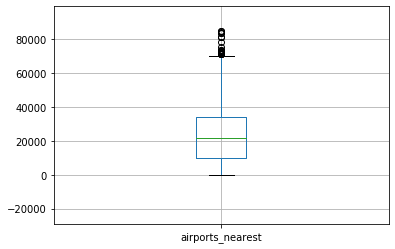


Избавляемся от выбросов для столбца airports_nearest, значения 
 которых больше Q3 + 1.5*IQR (70522.750) и меньше Q1 - 1.5*IQR (-25999.250).

Значения-выбросы удалены




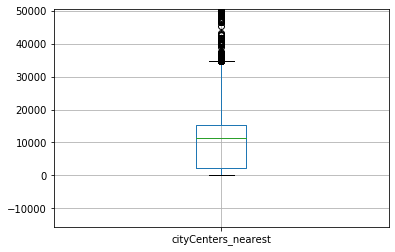


Избавляемся от выбросов для столбца cityCenters_nearest, значения 
 которых больше Q3 + 1.5*IQR (34758.250) и меньше Q1 - 1.5*IQR (-17267.750).

Значения-выбросы удалены




In [87]:
improved_data = graph_creator(columns_list, improved_data) 

In [88]:
#Проверим результат на примере выбросов из таблицы total area. Посмотрим, остались ли значения площедей квартир, площадь
# которых больше 114.750 кв.м. :
improved_data.query('total_area > 114.70')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,meter_price,week_day,month,year,floor_type,live_total_ratio,kitchen_total_ratio


Теперь на месте значения-выбросв пропуски.

In [89]:
#Сравним исходную таблицу и измененной
for column in columns_list:
    print(column)                                         
    print(data[column].value_counts().sum()) # подсчет значений
    print(data[column].isna().sum())         # подсчет пропусков
    print(improved_data[column].value_counts().sum())
    print(improved_data[column].isna().sum())
    print('-------------')

total_area
22459
1240
22459
1240
-------------
last_price
21665
2034
21665
2034
-------------
rooms
23609
90
23609
90
-------------
ceiling_height
23673
26
23673
26
-------------
days_exposition
21677
2022
21677
2022
-------------
airports_nearest
23672
27
23672
27
-------------
cityCenters_nearest
23252
447
23252
447
-------------


Следующий момент остался неясен : При сравнении исходной таблицы данных 'data' и 'improved_data' нет никакой разницы. Получается после удаления выбросов из 'improved_data' он так же удалились из 'data' и совершенно не ясно как.


### Вывод

Для удаления выбивающихся значений я написал функцию 'graph_creator', которая автоматически выводила диаграммы размаха и 
удаляла все выбросы. Выбросами я счел все значения, больше суммы третьего квартиля и полтора межквартильного размаха 
(Q3 + 1.5*IQR) и меньшие разности первого квартиля и полтора межквартильного размаха (Q1 - 1.5*IQR). Я не включил в этот список остальные столбцы, т.к. либо они представляют категориальные переменные ('week_day', 'month', 'balcony', 'floors_total' и др.), либо не участвуют в дальнейшем исследовании согласно заданю проекта (например : 'kitchen_area', 'parks_nearest', 'pounds_nearest' )

Вот какие особенности по каждому столбцу я обнаружил :
1. total_area
   Есть недвижимость больше 100 кв.м., однако такие площади далеки от медианы и их достаточно мало, чтобы считать выбросами
        
2. last_price
   Квартиры дороже 10 млн.руб в меньшенстве, будем считать их выбросами
        
3. rooms
   Обычно имеются квартиры от с 1-3 комнатами, но редко встречается недвижимость с 6 и более комнатами. Больше 6 комнат -
   будем счить выбросами
        
4. ceiling_height
   Потолков ниже двух метров буквально единицы (выбросы), а выше 3.25 значительно больше. Тем не менее основная масса              лежит в интервале от 2.5 м до 2.75. Выше 3.25 - выбросы
        
5. days_exposition
   Объявления, существовавшие более 500 суток - выбросы 
        
6. airports_nearest
   Расстояния до аэропорта примерно более 60 000 м редки, поэтому считаем их выбросами
        
7. cityCenters_nearest
   Расстояния до центра примерно более 26 000 м редки, поэтому будем считать их выбросами
        
        
        
    '

#### Вопросы куратору
1. Какие лучше добавить изменения в коде функции 'graph_creator', чтобы она удаляла выбросы методом query ? 

(новый:) 2. Следующий момент остался неясен : При сравнении исходной таблицы данных 'data' и 'improved_data' нет никакой разницы. Получается после удаления выбросов из 'improved_data' он так же удалились из 'data' и совершенно не ясно как.

### Факторы больше всего влияющие на стоимость квартиры
Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года.

#### Звисимость цены квартиры от квадратного метра

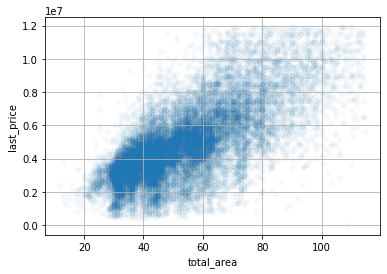

In [90]:
improved_data.plot(x = 'total_area', y = 'last_price', kind='scatter', grid = True, alpha=0.03) #построим диаграмму рассеивания

Видна зависимость - чем больше площадь, тем обычно дороже недвижимость. Посчитам коэффициент корреляции Пирсона:

In [91]:
improved_data['total_area'].corr(improved_data['last_price'])

0.695302142067236

Зависимость поддтверждается. Коэффициент корреляции почти 0,7 и положительный. 

#### Звисимость цены квартиры от числа комнат

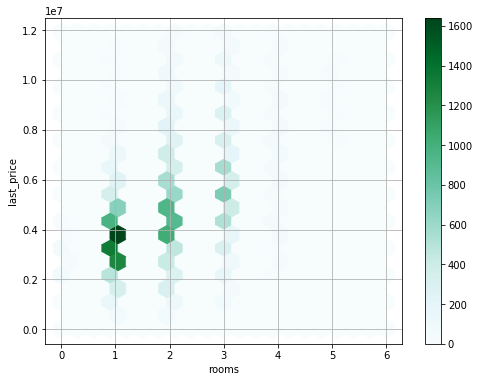

In [92]:
improved_data.plot(x='rooms', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

Видна зависимость - чем больше комнат, тем обычно дороже недвижимость. Посчитам коэффициент корреляции Пирсона:

In [93]:
improved_data['rooms'].corr(improved_data['last_price'])

0.4528623686323605

Зависимость действительно есть, но она слабая.

#### Зависимость цены квартиры от этажа(первого или последнего)

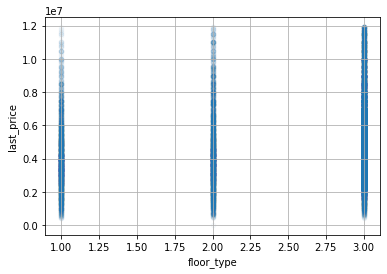

In [94]:
improved_data.plot(x = 'floor_type', y = 'last_price', kind='scatter', grid = True, alpha=0.03)

1 - первый
2 - последний
3 - другой

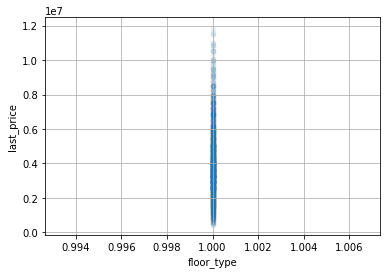

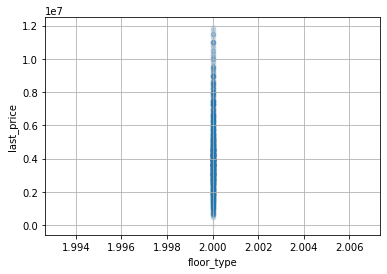

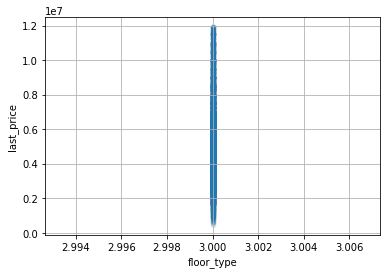

In [95]:
# используем метод groupby для каждого из 3ех значений столбца 'floor_type' (1 - первый, 2 - последний, 3 - другой)
# для построения диаграмм рассеивания и подсчета корреляций
for name, floor_data in improved_data.groupby('floor_type'):
    floor_data.plot(x = 'floor_type', y = 'last_price', kind='scatter', grid = True, alpha=0.03)
    print('')
    
    

Может показаться, что квартиры на последнем этаже дороже тех, что на первом (число квартир стоимостью больше 8 млн среди последних этажей явно больше, чем среди первых. Чтобы расчитать точную зависимость посчитаем коэффициент корреляции, выделяя срез даннных.

In [96]:
first_and_last_floors = improved_data.query('floor_type in [1,2]') # информация только о кварртирах на первых и последних этажах


In [97]:
first_and_last_floors['floor_type'].corr(first_and_last_floors['last_price'])

0.08176911112082909

Как оказалось, зависимости между ценой первого и последнего этажами не оказадось.

#### Зависимость цены квартиры от удаленности от центра

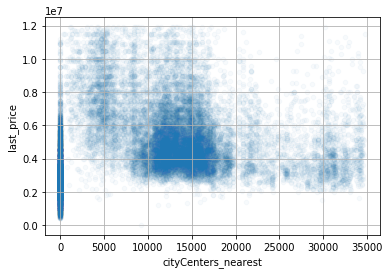

In [98]:
improved_data.plot(x = 'cityCenters_nearest', y = 'last_price', kind='scatter', grid = True, alpha=0.03)

Из диаграммы рассеивания можно наблюдать, как цена квартиры резко падает после отметки в ~17км от центра. Посчитаем коэф. корреляции:

In [99]:
improved_data['cityCenters_nearest'].corr(improved_data['last_price'])

0.15098706741933166

Наблюдается умеренная отрицательная корреляция : чем больше расстояние от центра, тем дешевле квартиры. Резкое сниженижается стоимость 
недвижимости расположенной дальше 17 км от центра. Проверим где территориально расположена недвижимость:


In [100]:
improved_data['locality_name'].value_counts().sort_values(ascending = False).head() 

Санкт-Петербург    15721
посёлок Мурино       522
посёлок Шушары       440
Всеволожск           398
Пушкин               369
Name: locality_name, dtype: int64

Выяснилось, что большинство недвижимости находится Санкт-Петербурге. Скорее всего резкое падение цен обусловленно, границами
города в находящихся на расстоянии 15-17 км от центра города

#### Зависимость цены квартиры от дня недели

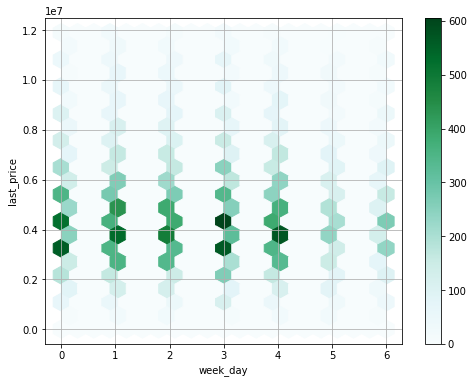

In [101]:
improved_data.plot(x='week_day', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

Последние цены в каждый день публикации распределены примерно одинаковы. Построим сводную таблицу и посчитаем коэфф
Пирсона:

In [102]:
improved_data.pivot_table(index = 'week_day', values = 'last_price')

,last_price
week_day,
0,4.847435e+06
1,4.905661e+06
2,4.884044e+06
3,4.856808e+06
4,4.826609e+06
5,4.745465e+06
6,4.781053e+06


In [103]:
improved_data['week_day'].corr(improved_data['last_price'])

-0.01524006607697302

Единого тренда не наблюдается, зависимости нет. Самая высокая средняя цена у объявлений, сделанных во вторник ~4.9 млн. руб.
Самая низкая в субботу.

#### Зависимость цены квартиры от месяца

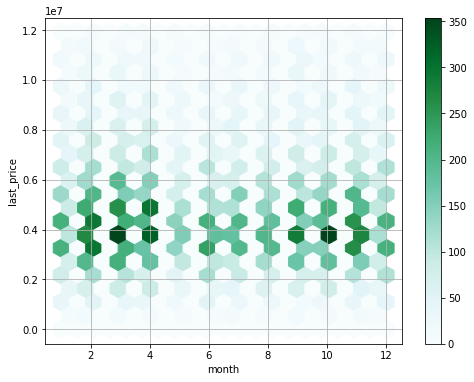

In [104]:
improved_data.plot(x='month', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)


In [105]:
improved_data['month'].corr(improved_data['last_price'])

0.005417063310301122

In [106]:
improved_data.pivot_table(index = 'month', values = 'last_price', aggfunc = 'median').sort_values(by = 'last_price', ascending = False)

,last_price
month,
4,4564580.0
12,4490000.0
11,4450000.0
3,4433484.0
9,4401770.5
1,4400000.0
2,4400000.0
10,4400000.0
8,4395000.0


Зависимость между последовательно идущими мясяцами года отсутствует. Объявлния сделанные в апреле и декабре в среднем дороже
всех остальных. Самая низкая средняя цена наблюдается в июне и мае

#### Зависимость цены квартиры от года

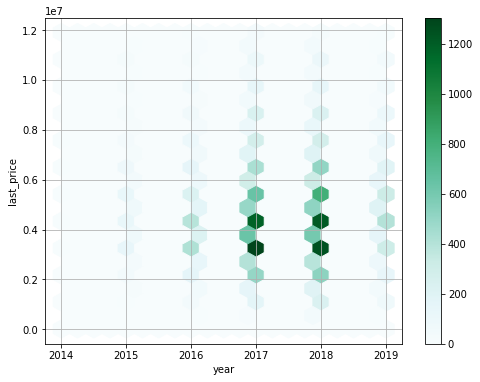

In [107]:
improved_data.plot(x='year', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

In [108]:
improved_data.pivot_table(index = 'year', values = 'last_price', aggfunc = 'mean').sort_values(by = 'last_price', ascending = False)

,last_price
year,
2014,5.782435e+06
2015,5.255896e+06
2019,5.110410e+06
2016,4.809851e+06
2017,4.779289e+06
2018,4.777875e+06


In [109]:
improved_data['year'].corr(improved_data['last_price'])

-0.0034802382797292143

Явной зависимости цены недвижимости с течением лет нет. Средняя цена объявлений, созданных в 2014 г. самая высокая, в 2018 и 2017
самая низкая

### Вывод
Как обязательные критерии для каждого пункта выявления зависимости я использовал коэффициент Пирсона и одну из двух типов
диаграмм рассеивания в зависимости от наглядности. Тип hexbin более удобен для работы с меньшим количеством значений, в то
время, как scatter для более разнообразных значений. По необходимости использовал pivot_table для выявления рекордсменов по средним значениям времени. В моем случае имеется в виду разнообразность значений по оси x.

#### Зависимости: 
1. Больше всего (из: квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра, дня, месяца, года )  цена квартиры зависит от площади и числа комнат

2. Площадь
Чем больше площадь, тем выше цена. коэф. Пирсона ~0.695.
3. Число комнат
Также цена зависит от числа комант - чем больше комнат, тем выше цена. коэфф Пирсона  ~0.45.
4. Удаленность от центра
Цена недвижимости не так сильно, но умеренно зависит от удаленности от центра. Чем дальше от центра, тем дешевле. Коэф. Пирсона  ~ -0,38. Стоит отметить резкое сниженижие стоимости недвижимости, расположенной дальше 17 км от центра. Скорее всего резкое падение цен обусловленно границами города Санкт-Петербург, находящихся на расстоянии 15-17 км от центра города.
5. Этаж
Цена не зависит от этажа (первого или последнего). Коэфф. Пирсона  ~0.08
6. День недели
Зависимости выраженной коэффицентом присона по изменению цен в течении дней недели не обнаружено. Самая высокая средняя цена у объявлений, сделанных во вторник ~4.9 млн. руб. Самая низкая - в субботу ~ 4.7.
7. Месяц
Зависимость между последовательно идущими мясяцами года, выраженная коэффицентом присона, отсутствует. Объявлния сделанные в апреле и декабре в среднем дороже всех остальных. Самая низкая средняя цена наблюдается в июне и мае.
8. Год
Зависимости цены недвижимости с течением лет нет, согласно коэф Пирсона. Средняя цена объявлений, созданных в 2014 г. самая высокая, в 2018 и 2017 - самая низкая



 
   
   


### 10 населенных пунктов с наибольшим числом объявлений. 
Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name

In [110]:
#найдем эти 10 населенный пунктов с наибольшим числом объявлений

top_ten = improved_data['locality_name'].value_counts().sort_values(ascending = False).head(10)
print(top_ten)

Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64


In [111]:
top_indexes = top_ten.index # возьмем список индексов)

In [112]:
#получим срез с только с этими локациями
top_ten_data = improved_data.query('locality_name in @top_indexes')

In [113]:
top_indexes

Index(['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск',
       'Пушкин', 'Колпино', 'посёлок Парголово', 'Гатчина', 'деревня Кудрово',
       'Выборг'],
      dtype='object')

In [114]:
#посчитаем среднюю цену квадратного метра в этих локациях
top_ten_data.pivot_table(index = 'locality_name', values = 'meter_price', aggfunc = 'median').sort_values(by = 'meter_price', ascending = False)
# Я взял meadian вместо mean, чтобы не сбить результат слишком высокими значениями

,meter_price
locality_name,
Санкт-Петербург,104761.904762
Пушкин,100000.000000
деревня Кудрово,91860.465116
посёлок Парголово,91642.857143
посёлок Мурино,85878.462169
посёлок Шушары,76876.172608
Колпино,74723.748474
Гатчина,67796.610169
Всеволожск,65789.473684


Стоимость квадратного метра в Санкт-Петербурге самая дорогая и составляет 104 761 р. за кв.м.
Самая низкая цена за метр в Выборге. Она составила 58 158 р. за кв.м.
Из всех 10 локаций выбивается Пушкин с целой медианой. На всякий случай проверим данные :

In [115]:
pushkin_data = improved_data.query('locality_name in "Пушкин"')

In [116]:
pushkin_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,meter_price,week_day,month,year,floor_type,live_total_ratio,kitchen_total_ratio
14,1,4400000.0,36.0,2016-06-23,1.0,-1.0,6,17.0,1,False,...,1,96,203.0,122222.222222,3,6,2016,1,0.472222,0.222222
28,8,4170000.0,44.0,2017-12-13,1.0,2.9,6,20.8,1,False,...,1,118,74.0,94772.727273,2,12,2017,1,0.472727,0.265909
50,1,4500000.0,48.2,2017-11-13,1.0,2.7,5,25.4,4,False,...,3,330,152.0,93360.995851,0,11,2017,3,0.526971,0.186722
109,2,7497600.0,62.5,2015-12-08,2.0,-1.0,5,35.5,5,False,...,0,-1,NaN,119961.600000,1,12,2015,2,0.568000,0.152000
126,10,4050000.0,51.0,2019-04-23,2.0,-1.0,5,30.5,1,False,...,1,659,-1.0,79411.764706,1,4,2019,1,0.598039,0.129412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23358,7,5500000.0,57.0,2016-05-07,3.0,2.5,5,36.6,5,False,...,1,928,397.0,96491.228070,5,5,2016,2,0.642105,0.087719
23409,9,4550000.0,48.0,2017-06-02,2.0,-1.0,9,29.5,6,False,...,0,-1,190.0,94791.666667,4,6,2017,3,0.614583,0.135417
23438,0,4600000.0,55.0,2017-01-23,3.0,-1.0,4,41.0,4,False,...,0,-1,172.0,83636.363636,0,1,2017,2,0.745455,0.090909
23488,7,4500000.0,44.0,2018-03-03,1.0,-1.0,5,23.0,3,False,...,0,-1,168.0,102272.727273,5,3,2018,3,0.522727,0.250000


In [117]:
integer_values = improved_data.query('meter_price == 100000')

In [118]:
integer_values

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,meter_price,week_day,month,year,floor_type,live_total_ratio,kitchen_total_ratio
4,2,10000000.0,100.0,2018-06-19,2.0,3.03,14,32.0,13,False,...,1,48,121.0,100000.0,1,6,2018,3,0.320000,0.410000
129,0,3200000.0,32.0,2018-02-01,1.0,2.50,9,18.0,3,False,...,0,-1,40.0,100000.0,3,2,2018,3,0.562500,0.250000
149,9,5300000.0,53.0,2018-06-28,2.0,2.65,12,31.5,6,False,...,1,878,55.0,100000.0,3,6,2018,3,0.594340,0.143396
327,3,3200000.0,32.0,2018-09-10,1.0,2.80,12,17.0,2,False,...,1,97,9.0,100000.0,0,9,2018,3,0.531250,0.187500
337,19,5500000.0,55.0,2018-03-06,2.0,2.70,9,31.2,4,False,...,0,-1,7.0,100000.0,1,3,2018,3,0.567273,0.154545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23506,13,6500000.0,65.0,2017-12-25,2.0,2.70,22,36.0,15,False,...,1,797,271.0,100000.0,0,12,2017,3,0.553846,0.169231
23530,0,3000000.0,30.0,2018-03-28,1.0,2.55,5,-1.0,3,False,...,0,-1,45.0,100000.0,2,3,2018,3,-0.033333,-0.033333
23534,9,3900000.0,39.0,2017-12-01,1.0,2.65,16,-1.0,15,False,...,0,-1,464.0,100000.0,4,12,2017,3,-0.025641,0.256410
23582,12,3800000.0,38.0,2017-09-05,1.0,-1.00,5,22.0,2,False,...,0,-1,38.0,100000.0,1,9,2017,3,0.578947,0.215789


In [119]:
pushkin_data['last_price'].corr(pushkin_data['total_area']) #посчитам коэфф Пирсона

0.874803654206004

Да, все ОК. Из-за большинства целых значений в last_price и целых значений в total_area, которые,
кстаи говоря напрямую зависят друг от друга (коэфф Пирсона - 0.87), образовался целый пласт одинаковых цен за метр. Отмечу, что цена метра 259 квартир из 369 зависит только от общей площади. Предположительно, такая аномальная зависимость может объясняться тем, что объявления может размещать
сам застройщик с едиными тарифами на цену.

### Вывод

10 самых популярных населенных пунктов среди всех объявлний :
    1. Санкт-Петербург      15721
    2. посёлок Мурино         522
    3. посёлок Шушары         440
    4. Всеволожск             398
    5. Пушкин                 369
    6. Колпино                338
    7. посёлок Парголово      327
    8. Гатчина                307
    9. деревня Кудрово        299
    10. Выборг                 237

Стоимость квадратного метра в Санкт-Петербурге самая дорогая и составляет 104 761 р. за кв.м.
Объясняется это тем, что Спб - крупных город и административный центр Лен. области
Самая низкая цена за метр в Выборге. Она составила 58 158 р. за кв.м.
Выборг тоже расположен в Лененградской области, низкая цена скорее всего объясняется его высокой уда-
ленностью от административернр центра.

   

### Изучение квартир в Санкт-Петербурге
Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

In [120]:
#Создадим срез данных по Санкт-Петербургу
spb_data = improved_data.query('locality_name in "Санкт-Петербург"')

In [121]:
spb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15721 entries, 0 to 23697
Data columns (total 29 columns):
total_images            15721 non-null int64
last_price              13763 non-null float64
total_area              14579 non-null float64
first_day_exposition    15721 non-null datetime64[ns]
rooms                   15634 non-null float64
ceiling_height          15705 non-null float64
floors_total            15721 non-null int64
living_area             15721 non-null float64
floor                   15721 non-null int64
is_apartment            15721 non-null bool
studio                  15721 non-null bool
open_plan               15721 non-null bool
kitchen_area            15721 non-null float64
balcony                 15721 non-null int64
locality_name           15721 non-null object
airports_nearest        15721 non-null float64
cityCenters_nearest     15721 non-null float64
parks_around3000        15721 non-null int64
parks_nearest           15721 non-null int64
ponds_around3

In [126]:
# получим столбец с округленным расстояением в километрах
spb_data.loc[:,'km_distance'] = ((spb_data.loc[:,'cityCenters_nearest'] / 1000).round())

In [127]:
# посчитаем среднюю цену для каждого километра
km_price = spb_data.pivot_table(index = 'km_distance', values = 'last_price', aggfunc = 'median')

In [128]:
km_price

,last_price
km_distance,
-0.0,6650000.0
1.0,8500000.0
2.0,8200000.0
3.0,7325000.0
4.0,7500000.0
5.0,7500000.0
6.0,6800000.0
7.0,6300000.0
8.0,6300000.0


In [129]:
km_price['km_distance'] = km_price.index #создадим столбец km_distance, чтобы обратиться к нему в plot

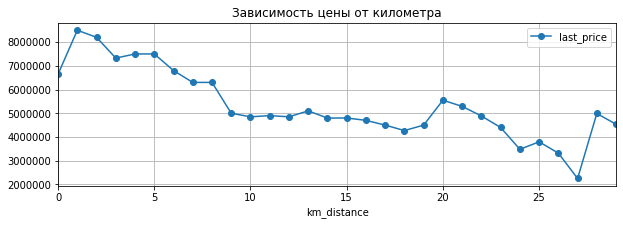

In [130]:
km_price.plot(style = 'o-',
              title = 'Зависимость цены от километра',
              x = 'km_distance', y = 'last_price',
              grid = True, figsize = (10,3)
             )

Цена стремительно падает примерно после 3ех километров. Следовательно область в пределах 3 км. от центра входит в центральную зону.

### Вывод

Посчитав среднюю стоимость жилья в зависимости от расстояния от центра в километрах, я выснил, что
центральная зона расположена в пределах 3км от центра

### Анализ центральной зоны

Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [131]:
#Cоздадим срез для центральной зоны:
center = spb_data.query('km_distance <= 3')

In [132]:
center.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 24 to 23648
Data columns (total 30 columns):
total_images            940 non-null int64
last_price              586 non-null float64
total_area              696 non-null float64
first_day_exposition    940 non-null datetime64[ns]
rooms                   912 non-null float64
ceiling_height          939 non-null float64
floors_total            940 non-null int64
living_area             940 non-null float64
floor                   940 non-null int64
is_apartment            940 non-null bool
studio                  940 non-null bool
open_plan               940 non-null bool
kitchen_area            940 non-null float64
balcony                 940 non-null int64
locality_name           940 non-null object
airports_nearest        940 non-null float64
cityCenters_nearest     940 non-null float64
parks_around3000        940 non-null int64
parks_nearest           940 non-null int64
ponds_around3000        940 non-null int64
ponds_nea

#### Площадь

In [133]:
# создадим список необходимых для изучения столбцов
research_list2 = ['total_area', 'last_price', 'rooms', 'ceiling_height']

total_area


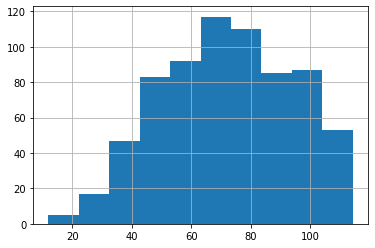

last_price


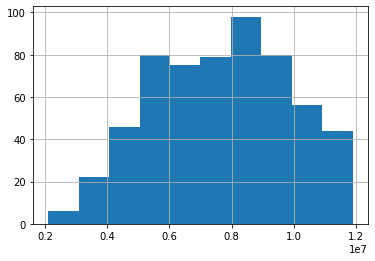

rooms


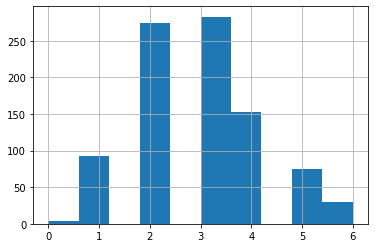

ceiling_height


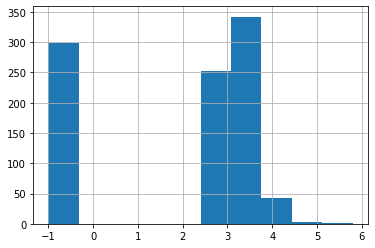

In [134]:
#Построим гистограмы для столбцов из списка автоматически
for column in research_list2:
    center[column].hist()
    print(column)
    plt.show()


1. Самая популярная в центре города приходится на интервал между 70-80 м.кв
2. Самая популярная стоимость квартир в центре приходится на 8-9 млн.р
3. Больше всего квартир 2-ух или 3-ех комнатные, трехкомнатных чуть больше. Однушек примерно в три раза меньше
4. В центре преобладают высокие потолки от 3ех метров.

#### Факторы, влияющие на стоимость квартиры (для центра)

#### Число комнат

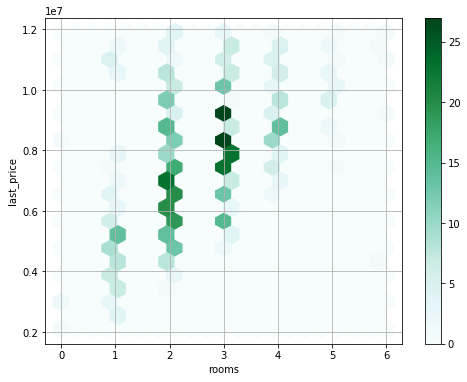

In [135]:
center.plot(x='rooms', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

In [136]:
center['rooms'].corr(center['last_price'])

0.5163534979764033

Замечена заметная положительная корреляция (0.52). Чем больше комнат, тем дороже цена

#### Этаж 

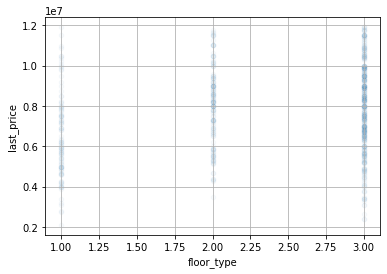

In [137]:
center.plot(x = 'floor_type', y = 'last_price', kind='scatter', grid = True, alpha=0.03)

1 - первый 2 - последний 3 - другой

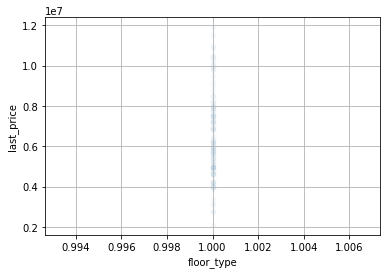

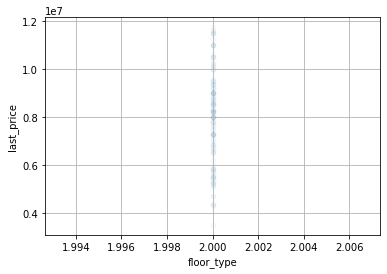

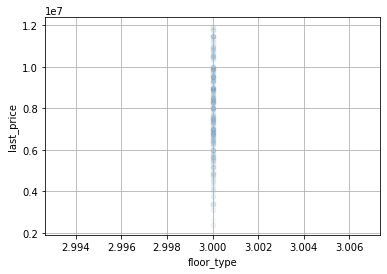

In [138]:
# используем метод groupby для каждого из 3ех значений столбца 'floor_type' (1 - первый, 2 - последний, 3 - другой)
# для построения диаграмм рассеивания и подсчета корреляций
for name, floor_data in center.groupby('floor_type'):
    floor_data.plot(x = 'floor_type', y = 'last_price', kind='scatter', grid = True, alpha=0.03)
    print('')

Из диаграм кажется, что цены квартир на последних этажах дороже.

In [139]:
first_and_last_floors_center = center.query('floor_type in [1,2]')# информация только о кварртирах на первых и последних этажах

In [140]:
first_and_last_floors_center['floor_type'].corr(first_and_last_floors_center['last_price'])

0.3421854600866046

Наблдается умеренная положительная корреляция. Зависимость есть. Следовательно, На последнем этаже квартиры дороже, чем на первом, но это не всегда так. 

#### Удаленность от центра

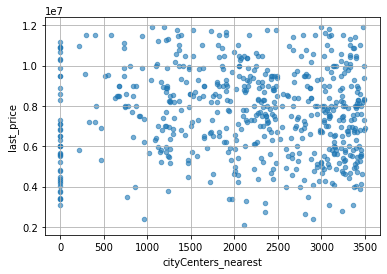

In [141]:
center.plot(x = 'cityCenters_nearest', y = 'last_price', kind='scatter', grid = True, alpha=0.6)

In [142]:
center['cityCenters_nearest'].corr(center['last_price'])

-0.053152583022878175

Корреляция слабая. Наблюдается ели заметная зависимость : до 1.5. киллометра от центра цены дешевле
с увелечением расстояния. Напримеп до 500 метров от центра нет квартир дешевле 5 млнр. При
увеличении расстояния ло 1500м. Появляются предложения дешеле. Скорее всего, низкая корреляция обусловленна тем, что цены сильно не меняются так как уже находятся в пределах центрального округа

#### Дата размещения объявления

##### День недели

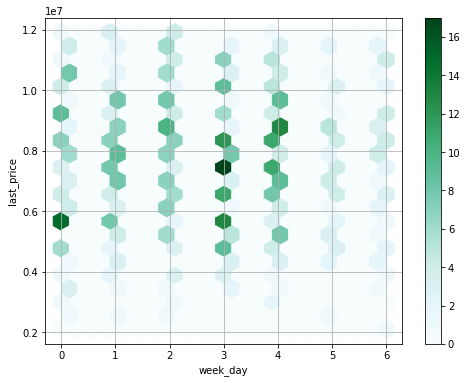

In [143]:
center.plot(x='week_day', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

In [144]:
center.pivot_table(index = 'week_day', values = 'last_price')

,last_price
week_day,
0,7.543386e+06
1,7.623898e+06
2,8.075246e+06
3,7.418927e+06
4,7.816080e+06
5,7.422977e+06
6,7.785317e+06


In [145]:
center['week_day'].corr(center['last_price'])

0.005566497433524804

Единого тренда не наблюдается, зависимости нет. Самая высокая средняя цена у объявлений, сделанных в воскресенье ~8.1 млн. руб. Самая низкая в четверг ~7.4

##### Зависимость цены квартиры от месяца

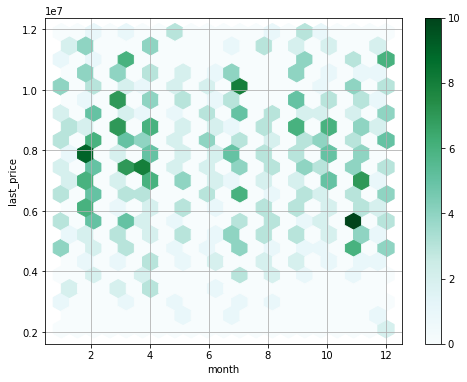

In [146]:
center.plot(x='month', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

In [147]:
center['month'].corr(center['last_price'])

-0.009641704872470168

In [148]:
center.pivot_table(index = 'month', values = 'last_price', aggfunc = 'median').sort_values(by = 'last_price', ascending = False)

,last_price
month,
9,8450000.0
3,8300000.0
12,8250000.0
7,8000000.0
10,8000000.0
2,7850000.0
6,7785000.0
5,7621500.0
4,7550000.0


Корреляция очень мала. Самая большая средняя цена приходится на Март и Сентябрь. Самая низкая - на Ноябрь и декабрь.

##### Зависимость цены квартиры от года

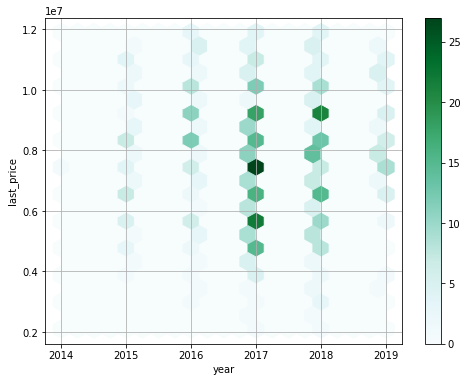

In [294]:
center.plot(x='year', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

In [295]:
center.pivot_table(index = 'year', values = 'last_price', aggfunc = 'mean').sort_values(by = 'last_price', ascending = False)

,last_price
year,
2019,8.403415e+06
2016,8.328948e+06
2015,7.780959e+06
2018,7.683792e+06
2014,7.500000e+06
2017,7.419615e+06


In [296]:
improved_data['year'].corr(first_and_last_floors['last_price'])

-0.00866953457280184

Явной зависимости цены недвижимости с течением лет нет. Средняя цена объявлений, созданных в 2019 г. самая высокая, в 2017 и 2014 самая низкая



### Вывод 
Я не стал автоматизироваь постоение графиков для  факторов, влияющих на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления) т.к. посчитал, что для разных факторов подходят разные диаграммы рассеивания, а где-то необхоимы сводные таблицы.


#### Проанализированные параметры :

1. Площадь
Самая популярная в центре города приходится на интервал между 70-80 м.кв
2. Цена 
Самая популярная стоимость квартир в центре приходится на 8-9 млн.р
4. Количество комнат
Больше всего квартир 2-ух или 3-ех комнатные, трехкомнатных чуть больше. Однушек примерно в три раза меньше
3. Высота потолков
В центре преобладают высокие потолки от 3ех метров.

#### Факторы, влияющие на стоимость квартиры : 
1. Из (число комнат, этаж, удалённость от центра, дата размещения объявления) цена больше всего зависит от числа комнат и этажа
2. Число комат
Замечена заметная положительная корреляция (0.52). Чем больше комнат, тем дороже цена
3. Этаж
Наблдается умеренная положительная корреляция (0.33). Зависимость есть. Следовательно, На последнем этаже квартиры дороже, чем на первом, но это не всегда так.
4. Удаленность от центра
Корреляция слабая. Наблюдается ели заметная зависимость : до 1.5. киллометра от центра цены дешевле с увелечением расстояния. Например до 500 метров от центра нет квартир дешевле 5 млнр. При увеличении расстояния ло 1500м. Появляются предложения дешеле. Скорее всего низкая корреляция обусловленна тем, что цены сильно не меняются так как уже находятся в пределах центрального округа
5. День недели
Единого тренда не наблюдается, зависимости нет. Самая высокая средняя цена у объявлений, сделанных в воскресенье ~8.1 млн. руб. Самая низкая в четверг ~7.4
6. Месяц
Корреляция очень мала. Самая большая средняя цена приходится на Март и Сентябрь. Самая низкая - на Ноябрь и декабрь.
7. Год 
Явной зависимости цены недвижимости с течением лет нет. Средняя цена объявлений, созданных в 2019 г. самая высокая, в 2017 и 2014 самая низкая


#### Сравнение параметров и факторов, влияющих на цену, центра города от общих выводов

##### По параметрам:

1. Площадь
Квартиры в центре в среднем больше площадью, чем остальные примерно на 30 кв.м.
2. Цена
Обычно квартиры в центре стоят чуть более, чем в два раза дороже, чем на периферии
3. Количество комнат
В центре количество двух и трехкомнатных квартир приблизительно одинаковое, однушек мало. На периферии преобладают двухкомнатные квартиры.
4. Высота потолков
В центре преобладают высокие потолки от 3 метров и выше. На периферии в среднем плюс минус 2.6 метра.
Это обусловлено разными стандартами застройки. В центре Санкт-Петербурга много дореволюционных 
зданий и сталинских номенклатурных домов, потолки у которых выше нынешних стандартов.

##### По факторам:

1. Среди квартир в центре цена больше всего из (число комнат, этаж, удалённость от центра, дата размещения объявления) зависит от числа комнат и этажа. Среди квартир на периферии больше всего (из: квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра, дня, месяца, года ) цена квартиры зависит от площади и числа комнат. 
2. Зависимость цены от числа комнат сильнее в центральных квартирах (~0.52), чем в квартирах вне центра ~0.45
3. Зависимости цены для квартир центрального округа от удаленности от центра почти не наблюдается, т.к. скорее всего они и так в центре, который сам по себе не так велик. Среди остальных квартир вне центра наблюдается умеренная зависимость (-0.38), что говорит о том, что с увиличением расстояния до центра цены снижаются.
4. В центре На втором этаже квартиры дороже, чем на первом, но это не всегда так (0.33). Среди остальных квартир зависимости между этажем и ценой нет.
5. Зависимости выраженной коэффицентом присона по изменению цен в течении дней недели не обнаружено. Среди квартир в центре и на периферии общих зависимостей по самым высоким и самым низким средним ценам по дням не обнаружено.
6. Ощутимой связи между последовательно идущими мясяцами года для центральных и остальных квартир, выраженная коэффицентом присона, отсутствует. Общих зависимостей по самым высоким и самым низким средним ценам по месяцам не обнаружено.
7. Зависимость между последовательно идущими мясяцами года, выраженная коэффицентом присона, отсутствует у обоих типов квартир. В 2017 г. средняя цена для обоих типов квартир была почти самая низкая.




### Общие выводы

### Шаг 5. Общий вывод

#### Исследованные параметры

1. Площадь
Квартиры в центре в среднем больше площадью, чем остальные примерно на 30 кв.м.
2. Цена
Обычно квартиры в центре стоят чуть более, чем в два раза дороже, чем на периферии
3. Количество комнат
В центре количество двух и трехкомнатных квартир приблизительно одинаковое, однушек мало. На периферии преобладают двухкомнатные квартиры.
4. Высота потолков
В центре преобладают высокие потолки от 3 метров и выше. На периферии в среднем плюс минус 2.6 метра.
Это обусловлено разными стандартами застройки. В центре Санкт-Петербурга много дореволюционных 
зданий и сталинских номенклатурных домов, потолки у которых выше нынешних стандартов.


#### Факторы больше всего влияющие на стоимость квартиры

1. Среди квартир в центре цена больше всего из (число комнат, этаж, удалённость от центра, дата размещения объявления) зависит от числа комнат и этажа. Среди квартир на периферии больше всего (из: квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра, дня, месяца, года ) цена квартиры зависит от площади и числа комнат. 
2. Зависимость цены от числа комнат сильнее в центральных квартирах (~0.52), чем в квартирах вне центра ~0.45
3. Зависимости цены для квартир центрального округа от удаленности от центра почти не наблюдается, т.к. скорее всего они и так в центре, который сам по себе не так велик. Среди остальных квартир вне центра наблюдается умеренная зависимость (-0.38), что говорит о том, что с увиличением расстояния до центра цены снижаются.
4. В центре На втором этаже квартиры дороже, чем на первом, но это не всегда так (0.33). Среди остальных квартир зависимости между этажем и ценой нет.
5. Зависимости выраженной коэффицентом присона по изменению цен в течении дней недели не обнаружено. Среди квартир в центре и на периферии общих зависимостей по самым высоким и самым низким средним ценам по дням не обнаружено.
6. Ощутимой связи между последовательно идущими мясяцами года для центральных и остальных квартир, выраженная коэффицентом присона, отсутствует. Общих зависимостей по самым высоким и самым низким средним ценам по месяцам не обнаружено.
7. Зависимость между последовательно идущими мясяцами года, выраженная коэффицентом присона, отсутствует у обоих типов квартир. В 2017 г. средняя цена для обоих типов квартир была почти самая низкая.
